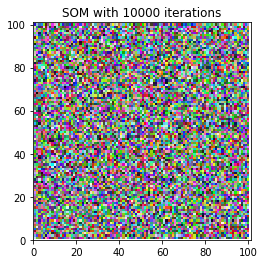

In [22]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#myDataset = np.random.randint(0, 255, (3,100))
myDataset = np.array([[1, 0, 0], [0, 1, 0],[0, 0.5, 0.25], [0, 0, 1],[0, 0, 0.5], [1, 1, 0.2],[1, 0.4, 0.25], [1, 0, 1]]).T * 255

network_dimensions = np.array([100,100])

n_iterations = 10000

init_learning_rate = 0.001

normalise_data = True

normalise_by_column = False

m = myDataset.shape[0]
n = myDataset.shape[1]

init_radius = max(network_dimensions[0], network_dimensions[1])/2

time_constant = n_iterations/np.log(init_radius)

data = myDataset

if normalise_data:
    if normalise_by_column:
        col_maxes = myDataset.max(axis = 0)
        data = myDataset/col_maxes[np.newaxis, :]
    else:
        data = myDataset/data.max()
        
net = np.random.random((network_dimensions[0],network_dimensions[1],m))

def find_bmu(t,net,m):
    bmu_idx = np.array([0,0])
    min_dist = np.iinfo(np.int).max
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x,y, :].reshape(m, 1)
            
            sq_dist = np.sum((w -t) ** 2)
            
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x,y])
                
        bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m,1)
        
        return (bmu,bmu_idx)
    
def decay_radius(initial_radius,i,time_constant):
    return initial_radius * np.exp(-i/time_constant)

def decay_learning_rate(initial_learning_rate,i,n_iterations):
    return initial_learning_rate * np.exp(-i/n_iterations)

def calculate_influence(distance, radius):
    return np.exp(-distance/(2 * (radius ** 2)))

for i in range(n_iterations):
    t = data[:, np.random.randint(0,n)].reshape(np.array([m, 1]))
    
    bmu, bmu_idx = find_bmu(t,net,m)
    
    r = decay_radius(init_radius,i,time_constant)
    l = decay_learning_rate(init_learning_rate,i,n_iterations)
    
for x in range(net.shape[0]):
    for y in range(net.shape[1]):
        w = net[x,y, :].reshape(m,1)
        
        w_dist = np.sum((np.array([x,y]) - bmu_idx) ** 2)
        
        if w_dist <= r**2:
            influence =calculate_influence(w_dist, r)
            new_w = w + (l * influence * (t - w))
            net[x,y,:] = new_w.reshape(1,3)
            
fig = plt.figure()

ax=fig.add_subplot(111,aspect='equal')
ax.set_xlim(0, net.shape[0] + 1)
ax.set_ylim(0, net.shape[1] + 1)
ax.set_title('SOM with %d iterations' %n_iterations)

for x in range(1,net.shape[0] + 1):
    for y in range(1,net.shape[1] +1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5),1,1,facecolor=net[x-1,y-1,:],edgecolor='none'))
    
plt.show()
            


    
    

